In [1]:
import pandas as pd
feats = pd.read_csv('bank_data_feats.csv', index_col=0)
target = pd.read_csv('bank_data_target.csv', index_col=0)

In [2]:
from sklearn.model_selection import train_test_split
test_size = 0.2
random_state = 42

X_train, X_test, y_train, y_test = train_test_split(feats, target, test_size=test_size, random_state=random_state)

In [3]:
X_train.shape

(3616, 32)

In [4]:
y_train.shape

(3616, 1)

In [5]:
X_test.shape

(905, 32)

In [6]:
y_test.shape

(905, 1)

In [60]:
from keras.layers import Dense, Activation
from keras.models import Sequential
model = Sequential()
input_shape = X_train.shape[1]
units = 1
model.add(Dense(2, input_dim=input_shape))
model.add(Activation('tanh'))
model.add(Dense(1, input_dim=2))
model.add(Activation('sigmoid'))

In [61]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [62]:
print(model.summary())

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 2)                 66        
_________________________________________________________________
activation_13 (Activation)   (None, 2)                 0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 3         
_________________________________________________________________
activation_14 (Activation)   (None, 1)                 0         
Total params: 69
Trainable params: 69
Non-trainable params: 0
_________________________________________________________________
None


In [63]:
history = model.fit(x=X_train, y=y_train, epochs=10, validation_split=0.2)

Train on 2892 samples, validate on 724 samples
Epoch 1/10
2892/2892 [==============================] - 1s 208us/step - loss: 1.3594 - acc: 0.4765 - val_loss: 1.1828 - val_acc: 0.5373
Epoch 2/10
2892/2892 [==============================] - 0s 86us/step - loss: 1.1312 - acc: 0.5377 - val_loss: 1.0290 - val_acc: 0.5718
Epoch 3/10
2892/2892 [==============================] - 1s 192us/step - loss: 0.9694 - acc: 0.5851 - val_loss: 0.8687 - val_acc: 0.6257
Epoch 4/10
2892/2892 [==============================] - 1s 210us/step - loss: 0.8319 - acc: 0.6317 - val_loss: 0.7379 - val_acc: 0.6713
Epoch 5/10
2892/2892 [==============================] - 0s 76us/step - loss: 0.7129 - acc: 0.6781 - val_loss: 0.6258 - val_acc: 0.7265
Epoch 6/10
2892/2892 [==============================] - 1s 201us/step - loss: 0.6093 - acc: 0.7296 - val_loss: 0.5443 - val_acc: 0.7597
Epoch 7/10
2892/2892 [==============================] - 1s 200us/step - loss: 0.5436 - acc: 0.7611 - val_loss: 0.4887 - val_acc: 0.7887
Epo

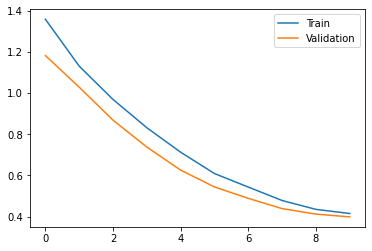

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

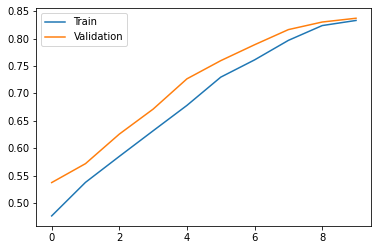

In [65]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [59]:
test_loss, test_acc = model.evaluate(X_test, y_test['y'])
print(f'The loss on the test set is {test_loss:.4f} and the accuracy is {test_acc*100:.3f}%')

905/905 [==============================] - 0s 19us/step
The loss on the test set is 1.6926 and the accuracy is 85.304%
